In [12]:
# english npy
# !wget https://storage.googleapis.com/drive-bulk-export-anonymous/20231129T121129.576Z/4133399871716478688/34e85a15-a77a-4124-86ba-f924e4d1d8f7/1/8c6dd990-4542-4158-b7ce-ef942df28e35?authuser

# english sentences

# !wget https://storage.googleapis.com/drive-bulk-export-anonymous/20231129T131734.703Z/4133399871716478688/f84fc530-1f1c-49cb-bdcb-a1ec8996f0ef/1/0ca73b34-d852-4daa-84ee-4882b578b207?authuser

# hindi npy
# !wget https://storage.googleapis.com/drive-bulk-export-anonymous/20231129T121224.584Z/4133399871716478688/72b69e23-bdac-4a10-89fd-b96fc4f0f46a/1/c20b8a8a-9f40-4453-b944-172ae23b01ff?authuser

# hindi sentences

# !wget https://storage.googleapis.com/drive-bulk-export-anonymous/20231129T121442.944Z/4133399871716478688/7353d225-cfb3-42d8-a765-b34101076c72/1/ec9d1512-2a88-4898-a308-81ca7415d16c?authuser

# itihaas.npy
# !wget https://storage.googleapis.com/drive-bulk-export-anonymous/20231129T164411.185Z/4133399871716478688/ac4ef89a-b78e-493a-a404-91ecd77d4cc2/1/d67d09ac-46e8-4afe-b27c-2d4e4eec0f65?authuser

# itihaas sentences

!wget https://storage.googleapis.com/drive-bulk-export-anonymous/20231129T164536.284Z/4133399871716478688/025941c7-4b4f-4e0a-aa20-f462e8dad04e/1/97a2fa30-812c-4bf9-ad39-c236d4debea3?authuser




--2023-11-30 05:08:25--  https://storage.googleapis.com/drive-bulk-export-anonymous/20231129T164536.284Z/4133399871716478688/025941c7-4b4f-4e0a-aa20-f462e8dad04e/1/97a2fa30-812c-4bf9-ad39-c236d4debea3?authuser
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.207, 74.125.26.207, 172.217.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5468920 (5.2M) [application/x-zip]
Saving to: ‘97a2fa30-812c-4bf9-ad39-c236d4debea3?authuser’

97a2fa30-812c-4bf9- 100%[===================>]   5.21M  --.-KB/s    in 0.03s   

2023-11-30 05:08:25 (177 MB/s) - ‘97a2fa30-812c-4bf9-ad39-c236d4debea3?authuser’ saved [5468920/5468920]



In [13]:
!unzip test.zip

Archive:  test.zip
  inflating: sans_sentences_itihas.txt  


In [7]:
# import numpy as np

## English Data

In [99]:
eng_tags_npy = np.load("sans_tags_english_finl.npy" , allow_pickle=True)

In [100]:
eng_tags_npy

array([list([('B-PER', 'धृतराष्ट्र'), ('I-ORG', 'समवेता'), ('O', 'उवाच')]),
       list([('O', 'तु'), ('O', 'सञ्जय'), ('O', 'दृष्ट्वा'), ('O', 'उवाच')]),
       list([('O', 'पश्यैतां'), ('O', 'पाण्डुपुत्राणामाचार्य')]), ...,
       list([('O', 'मुहुःश्रथ्ना'), ('O', 'मनस्यवे|')]),
       list([('O', 'तवं'), ('O', 'तयमिन्द्र')]),
       list([('O', 'देवानां'), ('O', 'वशम|')])], dtype=object)

In [101]:
eng_tag_sets = set()
eng_tag_dic = {}
for lst in eng_tags_npy:
  for tag,_ in lst:
    eng_tag_sets.add(tag)
    if tag not in eng_tag_dic:
      eng_tag_dic[tag] = 0
    eng_tag_dic[tag]+=1

eng_tag_sets,eng_tag_dic

({'B-LOC', 'B-ORG', 'B-PER', 'I-LOC', 'I-ORG', 'I-PER', 'O'},
 {'B-PER': 4961,
  'I-ORG': 34,
  'O': 85228,
  'B-LOC': 828,
  'I-PER': 274,
  'I-LOC': 106,
  'B-ORG': 124})

In [102]:
def english_tags_to_dict(english_npy):
  NER_Array = []
  for lst in english_npy:
    sent_with_tag = {}
    sent_with_tag['Sentence'] = []
    sent_with_tag['Tags'] = []
    for tag , word in lst:
      nword = word.strip()
      correct_tag = ""
      if tag in ['B-LOC' , 'I-LOC' ]:
        correct_tag = "LOCATION"
      elif tag in ['B-ORG' , "I-ORG" ]:
        correct_tag = "ORGANISATION"
      elif tag in ['B-PER' , 'I-PER']:
        correct_tag = "PERSON"
      else:
        correct_tag = "O"
      sent_with_tag["Sentence"].append(nword)
      sent_with_tag["Tags"].append(correct_tag)
    NER_Array.append(sent_with_tag)
  return NER_Array



In [103]:
NER_Array_English = english_tags_to_dict(eng_tags_npy)

In [104]:
NER_Array_English

[{'Sentence': ['धृतराष्ट्र', 'समवेता', 'उवाच'],
  'Tags': ['PERSON', 'ORGANISATION', 'O']},
 {'Sentence': ['तु', 'सञ्जय', 'दृष्ट्वा', 'उवाच'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['पश्यैतां', 'पाण्डुपुत्राणामाचार्य'], 'Tags': ['O', 'O']},
 {'Sentence': ['अत्र', 'युधि।', 'महेष्वासा', 'शूरा'],
  'Tags': ['PERSON', 'O', 'O', 'O']},
 {'Sentence': ['धृष्टकेतुश्चेकितानः', 'नरपुङ्गवः।।'], 'Tags': ['O', 'O']},
 {'Sentence': ['उत्तमौजाश्च', 'विक्रान्त', 'युधामन्युश्च', 'सर्व'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['विशिष्टा', 'तु', 'संज्ञार्थं'], 'Tags': ['O', 'PERSON', 'O']},
 {'Sentence': ['भवान्भीष्मश्च', 'कर्णश्च'], 'Tags': ['O', 'O']},
 {'Sentence': ['अन्ये', 'बहवः', 'मदर्थे'], 'Tags': ['O', 'O', 'O']},
 {'Sentence': ['अपर्याप्तं', 'तदस्माकं', 'बलं'], 'Tags': ['O', 'O', 'O']},
 {'Sentence': ['अयनेषु', 'भवन्तः'], 'Tags': ['O', 'O']},
 {'Sentence': ['संजनयन्हर्षं', 'तस्य', 'कुरुवृद्धः'], 'Tags': ['O', 'O', 'O']},
 {'Sentence': ['ततः', 'शङ्खाश्च', 'भेर्यश्च', 'सहसैवाभ्यह

In [105]:
eng_tag_sets = set()
eng_tag_dic = {}
for dic in NER_Array_English:
  sent = dic["Sentence"]
  tag = dic['Tags']
  for w,t in zip(sent , tag):
    if t not in eng_tag_dic:
      eng_tag_dic[t] = 0
    eng_tag_dic[t]+=1

eng_tag_sets,eng_tag_dic

(set(), {'PERSON': 5235, 'ORGANISATION': 158, 'O': 85228, 'LOCATION': 934})

In [106]:
print(len(NER_Array_English))

34373


In [107]:
print(len(open("/content/sans_eng_sentences_mydata.txt" , 'r').readlines()))

34374


# Hindi Data

In [108]:
hin_tags_npy = np.load("sans_tags_hindi_finl.npy" , allow_pickle=True)

In [109]:
hin_tags_npy

array([list([('O', ' वर्णानामर्थसंघानां'), ('O', ' रसानां'), ('O', ' छन्दसामपि।')]),
       list([('O', ' मंगलानां'), ('O', ' च'), ('O', ' कर्त्तारौ'), ('O', ' वाणीविनायकौ॥1॥')]),
       list([('O', ' भवानीशंकरौ'), ('O', ' वन्दे'), ('O', ' श्रद्धाविश्वासरूपिणौ।')]),
       ...,
       list([('O', ' सोच'), ('O', ' बहु'), ('O', ' बिधि'), ('O', ' भगत'), ('O', ' दल'), ('O', ' लोचन॥उमा'), ('O', ' सलिल'), ('O', ' बिमोचन।'), ('O', ' देखाई॥9॥'), ('O', ' राजिव'), ('O', ' नर')]),
       list([('O', ' सुनि'), ('O', ' कान'), ('B-PERSON', ' प्रभु'), ('O', ' करुना'), ('I-PERSON', ' गयउ'), ('O', ' बिकल'), ('O', ' रस॥61॥'), ('O', ' जिमि')]),
       list([('O', ' हरषि'), ('I-PERSON', ' प्रभु'), ('O', ' बैठे'), ('O', ' उठि'), ('O', ' हरषाई॥1॥'), ('O', ' राम'), ('O', ' कृतग्य'), ('O', ' हनुमाना।'), ('O', ' परम'), ('O', ' अति'), ('O', ' तब'), ('O', ' कीन्ह'), ('O', ' लछिमन')])],
      dtype=object)

In [110]:
hin_tag_sets = set()
hin_tag_dic = {}
for lst in hin_tags_npy:
  for tag,_ in lst:
    hin_tag_sets.add(tag)
    if tag not in hin_tag_dic:
      hin_tag_dic[tag] = 0
    hin_tag_dic[tag]+=1

hin_tag_sets,hin_tag_dic

({'B-LANGUAGE',
  'B-LOCATION',
  'B-MISC',
  'B-NUMEX',
  'B-ORGANIZATION',
  'B-PERSON',
  'B-RELIGION',
  'B-TIMEX',
  'I-LOCATION',
  'I-NUMEX',
  'I-PERSON',
  'I-TIMEX',
  'O'},
 {'O': 52269,
  'B-PERSON': 2854,
  'I-PERSON': 1859,
  'B-RELIGION': 11,
  'B-NUMEX': 709,
  'B-LOCATION': 193,
  'B-TIMEX': 80,
  'I-LOCATION': 42,
  'B-ORGANIZATION': 3,
  'I-TIMEX': 40,
  'I-NUMEX': 23,
  'B-MISC': 8,
  'B-LANGUAGE': 1})

In [111]:
def hindi_tags_to_dict(hindi_npy):
  NER_Array = []
  for lst in hindi_npy:
    sent_with_tag = {}
    sent_with_tag['Sentence'] = []
    sent_with_tag['Tags'] = []
    for tag , word in lst:
      nword = word.strip()
      correct_tag = ""
      if tag in ['B-LOCATION' , 'I-LOCATION' ]:
        correct_tag = "LOCATION"
      elif tag in ['B-ORGANIZATION' , "I-ORGANIZATION" ]:
        correct_tag = "ORGANISATION"
      elif tag in ['B-PERSON' , 'I-PERSON']:
        correct_tag = "PERSON"
      # elif tag in ['B-MISC']:
      #   correct_tag = "MISC"
      else:
        correct_tag = "O"
      sent_with_tag["Sentence"].append(nword)
      sent_with_tag["Tags"].append(correct_tag)
    NER_Array.append(sent_with_tag)
  return NER_Array



In [112]:
NER_Array_Hindi = hindi_tags_to_dict(hin_tags_npy)

In [113]:
NER_Array_Hindi

[{'Sentence': ['वर्णानामर्थसंघानां', 'रसानां', 'छन्दसामपि।'],
  'Tags': ['O', 'O', 'O']},
 {'Sentence': ['मंगलानां', 'च', 'कर्त्तारौ', 'वाणीविनायकौ॥1॥'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['भवानीशंकरौ', 'वन्दे', 'श्रद्धाविश्वासरूपिणौ।'],
  'Tags': ['O', 'O', 'O']},
 {'Sentence': ['पश्यन्ति',
   'याभ्यां',
   'विना',
   'न',
   'स्वान्तःस्थमीश्वरम्\u200c॥2॥'],
  'Tags': ['PERSON', 'PERSON', 'O', 'O', 'O']},
 {'Sentence': ['बोधमयं', 'वन्दे', 'नित्यं', 'गुरुं', 'शंकररूपिणम्\u200c।'],
  'Tags': ['O', 'O', 'O', 'PERSON', 'O']},
 {'Sentence': ['यमाश्रितो', 'हि', 'वन्द्यते॥3॥', 'सर्वत्र'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['सीतारामगुणग्रामपुण्यारण्यविहारिणौ।'], 'Tags': ['O']},
 {'Sentence': ['वन्दे', 'विशुद्धविज्ञानौ', 'कवीश्वरकपीश्वरौ॥4॥'],
  'Tags': ['O', 'O', 'O']},
 {'Sentence': ['उद्भवस्थितिसंहारकारिणीं', 'क्लेशहारिणीम्\u200c।'],
  'Tags': ['O', 'O']},
 {'Sentence': ['सीतां', 'सर्वश्रेयस्करीं', 'नतोऽहं', 'रामवल्लभाम्\u200c॥5॥'],
  'Tags': ['O', 'PERSON', 'O', '

In [114]:
hin_tag_sets = set()
hin_tag_dic = {}
for dic in NER_Array_Hindi:
  sent = dic["Sentence"]
  tag = dic['Tags']
  for w,t in zip(sent , tag):
    if t not in hin_tag_dic:
      hin_tag_dic[t] = 0
    hin_tag_dic[t]+=1

hin_tag_sets,hin_tag_dic

(set(), {'O': 53141, 'PERSON': 4713, 'LOCATION': 235, 'ORGANISATION': 3})

In [115]:
print(len(NER_Array_English) , len(NER_Array_Hindi) , len(NER_Array_English) + len(NER_Array_Hindi))

34373 6053 40426


#Itihaas data

In [116]:
itihaas_tags_npy = np.load("sans_tags_itihas.npy" , allow_pickle=True)

In [117]:
itihaas_tags_npy

array([list([('O', 'चीरं'), ('O', 'तस्यां'), ('O', 'वसानायां'), ('O', 'दशरथं')]),
       list([('O', 'तत्र'), ('O', 'प्रणादेन'), ('O', 'कैकेयि'), ('O', 'स')]),
       list([('O', 'सुकुमारी'), ('O', 'च'), ('O', 'सततं')]), ...,
       list([('O', 'एवमप्यग्निभूता'), ('O', 'अग्निर्विष्णुः')]),
       list([('O', 'चात्र'), ('O', 'अपि'), ('O', 'सनत्कुमारगीताः'), ('O', 'श्लोका'), ('O', 'पूर्वं')]),
       list([('O', 'सत्यात्'), ('O', 'नास्ति'), ('O', 'मातृसमो')])],
      dtype=object)

In [118]:
iti_tag_sets = set()
iti_tag_dic = {}
for lst in itihaas_tags_npy:
  for tag,_ in lst:
    iti_tag_sets.add(tag)
    if tag not in iti_tag_dic:
      iti_tag_dic[tag] = 0
    iti_tag_dic[tag]+=1

iti_tag_sets,iti_tag_dic

({'B-LOC', 'B-ORG', 'B-PER', 'I-LOC', 'I-ORG', 'I-PER', 'O'},
 {'O': 15317,
  'B-PER': 1067,
  'B-ORG': 19,
  'I-PER': 62,
  'B-LOC': 125,
  'I-LOC': 10,
  'I-ORG': 1})

In [119]:
def itihaas_tags_to_dict(itihaas_npy):
  NER_Array = []
  for lst in itihaas_npy:
    sent_with_tag = {}
    sent_with_tag['Sentence'] = []
    sent_with_tag['Tags'] = []
    for tag , word in lst:
      nword = word.strip()
      correct_tag = ""
      if tag in ['B-LOC' , 'I-LOC' ]:
        correct_tag = "LOCATION"
      elif tag in ['B-ORG' , "I-ORG" ]:
        correct_tag = "ORGANISATION"
      elif tag in ['B-PER' , 'I-PER']:
        correct_tag = "PERSON"
      else:
        correct_tag = "O"
      sent_with_tag["Sentence"].append(nword)
      sent_with_tag["Tags"].append(correct_tag)
    NER_Array.append(sent_with_tag)
  return NER_Array



In [120]:
NER_Array_Itihaas = itihaas_tags_to_dict(itihaas_tags_npy)

In [121]:
NER_Array_Itihaas

[{'Sentence': ['चीरं', 'तस्यां', 'वसानायां', 'दशरथं'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['तत्र', 'प्रणादेन', 'कैकेयि', 'स'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['सुकुमारी', 'च', 'सततं'], 'Tags': ['O', 'O', 'O']},
 {'Sentence': ['इयं', 'हि', 'कस्यापि'], 'Tags': ['O', 'PERSON', 'O']},
 {'Sentence': ['प्रतिज्ञा', 'चीराण्यपास्याज्जनकस्य', 'दत्तपूर्वा।'],
  'Tags': ['O', 'O', 'O']},
 {'Sentence': ['मया', 'अजीवनाहेण'], 'Tags': ['O', 'O']},
 {'Sentence': ['यदि', 'रामेण', 'ते', 'पापे'],
  'Tags': ['O', 'O', 'ORGANISATION', 'O']},
 {'Sentence': ['मृगीवोत्फुल्लनयना'], 'Tags': ['O']},
 {'Sentence': ['ननु', 'पर्याप्तमेवं'], 'Tags': ['O', 'O']},
 {'Sentence': ['त्वयोक्तं', 'प्रतिज्ञातं', 'तावत्', 'मया', 'शृण्वता।', 'देवि'],
  'Tags': ['O', 'O', 'O', 'O', 'O', 'O']},
 {'Sentence': ['तत्त्वेतत्', 'गन्तुमिच्छसि।'], 'Tags': ['O', 'PERSON']},
 {'Sentence': ['ब्रुवन्तं', 'एवं', 'पितरं'], 'Tags': ['O', 'O', 'O']},
 {'Sentence': ['धार्मिक', 'इयं', 'कौसल्या', 'वृद्धा', 'मम'],
  'Ta

In [122]:
print(len(NER_Array_Itihaas))

5348


In [123]:
iti_lines = []
with open("/content/sans_sentences_itihas.txt" , "r") as file:
  iti_lines = file.readlines()

In [124]:
iti_lines[5347] , NER_Array_Itihaas[-1]

('नास्ति सत्यात् परो धर्मो नास्ति मातृसमो गुरुः। ब्राह्मणेभ्यः परं नास्ति प्रेत्य चेह च भूतये॥\n',
 {'Sentence': ['सत्यात्', 'नास्ति', 'मातृसमो'], 'Tags': ['O', 'O', 'O']})

In [125]:
with open("itihaas_filltered.txt" , "w") as file:
  for i in range(5347):
    file.write(iti_lines[i])

In [126]:
NER_Array_Itihaas

[{'Sentence': ['चीरं', 'तस्यां', 'वसानायां', 'दशरथं'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['तत्र', 'प्रणादेन', 'कैकेयि', 'स'],
  'Tags': ['O', 'O', 'O', 'O']},
 {'Sentence': ['सुकुमारी', 'च', 'सततं'], 'Tags': ['O', 'O', 'O']},
 {'Sentence': ['इयं', 'हि', 'कस्यापि'], 'Tags': ['O', 'PERSON', 'O']},
 {'Sentence': ['प्रतिज्ञा', 'चीराण्यपास्याज्जनकस्य', 'दत्तपूर्वा।'],
  'Tags': ['O', 'O', 'O']},
 {'Sentence': ['मया', 'अजीवनाहेण'], 'Tags': ['O', 'O']},
 {'Sentence': ['यदि', 'रामेण', 'ते', 'पापे'],
  'Tags': ['O', 'O', 'ORGANISATION', 'O']},
 {'Sentence': ['मृगीवोत्फुल्लनयना'], 'Tags': ['O']},
 {'Sentence': ['ननु', 'पर्याप्तमेवं'], 'Tags': ['O', 'O']},
 {'Sentence': ['त्वयोक्तं', 'प्रतिज्ञातं', 'तावत्', 'मया', 'शृण्वता।', 'देवि'],
  'Tags': ['O', 'O', 'O', 'O', 'O', 'O']},
 {'Sentence': ['तत्त्वेतत्', 'गन्तुमिच्छसि।'], 'Tags': ['O', 'PERSON']},
 {'Sentence': ['ब्रुवन्तं', 'एवं', 'पितरं'], 'Tags': ['O', 'O', 'O']},
 {'Sentence': ['धार्मिक', 'इयं', 'कौसल्या', 'वृद्धा', 'मम'],
  'Ta

In [127]:
def get_NER_Data(ner_array , file_path):
  lines = []
  with open(file_path , "r" , encoding="utf-8") as file:
    for line in file.readlines():
      words = line.strip().split()
      lines.append(words)

  final_NER_Array = []
  for line , ner_data in zip(lines , ner_array):
    tmp_dic = {}
    sent = ner_data["Sentence"]
    tag = ner_data["Tags"]
    for word,tag in zip(sent , tag):
      tmp_dic[word] = tag

    ner_dict = {}
    ner_dict["Sentence"] = []
    ner_dict["Tags"] = []
    for word in line:
      ner_dict["Sentence"].append(word)
      if word not in tmp_dic:
        ner_dict["Tags"].append("O")
      else:
        ner_dict["Tags"].append(tmp_dic[word])
    final_NER_Array.append(ner_dict)

  return final_NER_Array



In [128]:
NER_Array_Hindi_Final = get_NER_Data(NER_Array_Hindi ,  "/content/sans_hindi_sentences_mydata.txt")

In [129]:
NER_Array_Hindi_Final[3] , NER_Array_Hindi[3]

({'Sentence': ['याभ्यां',
   'विना',
   'न',
   'पश्यन्ति',
   'सिद्धाः',
   'स्वान्तःस्थमीश्वरम्\u200c॥2॥'],
  'Tags': ['PERSON', 'O', 'O', 'PERSON', 'O', 'O']},
 {'Sentence': ['पश्यन्ति',
   'याभ्यां',
   'विना',
   'न',
   'स्वान्तःस्थमीश्वरम्\u200c॥2॥'],
  'Tags': ['PERSON', 'PERSON', 'O', 'O', 'O']})

In [130]:
print(len(NER_Array_Hindi))

6053


In [131]:
NER_Array_English_Final = get_NER_Data(NER_Array_English , "/content/sans_eng_sentences_mydata.txt")

In [132]:
NER_Array_English_Final[10] , NER_Array_English[10]

({'Sentence': ['अयनेषु',
   'च',
   'सर्वेषु',
   'यथाभागमवस्थिताः।',
   'भीष्ममेवाभिरक्षन्तु',
   'भवन्तः',
   'सर्व',
   'एव',
   'हि।।'],
  'Tags': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']},
 {'Sentence': ['अयनेषु', 'भवन्तः'], 'Tags': ['O', 'O']})

In [133]:
NER_Array_Itihaas_Final = get_NER_Data(NER_Array_Itihaas , "/content/itihaas_filltered.txt")

In [134]:
NER_Array_Itihaas_Final[10] , NER_Array_Itihaas[10]

({'Sentence': ['तत्त्वेतत्',
   'समतिक्रम्य',
   'निरयं',
   'गन्तुमिच्छसि।',
   'मैथिलीमपि',
   'या',
   'हि',
   'त्वमीक्षसे',
   'चीरवासिनीम्॥'],
  'Tags': ['O', 'O', 'O', 'PERSON', 'O', 'O', 'O', 'O', 'O']},
 {'Sentence': ['तत्त्वेतत्', 'गन्तुमिच्छसि।'], 'Tags': ['O', 'PERSON']})

# Data Combining


In [135]:
NER_Array_English.extend(NER_Array_Hindi)

In [70]:
NER_Array_English.extend(NER_Array_Itihaas)

In [71]:
print(len(NER_Array_English))

45774


In [90]:
import pickle

with open("data_without_full_sentence.pkl" , "wb") as file:
  pickle.dump(NER_Array_English , file)

In [91]:
NER_Array_English_Final.extend(NER_Array_Hindi_Final)

In [92]:
NER_Array_English_Final.extend(NER_Array_Itihaas_Final)

In [93]:
print(len(NER_Array_English_Final))

57173


In [94]:
import pickle

with open("data_with_full_sentence.pkl" , "wb") as file:
  pickle.dump(NER_Array_English_Final , file)

#Data Statistics

In [95]:
data = pickle.load(open("data_without_full_sentence.pkl" , 'rb'))

In [96]:
Tags_dictionary = {}
Tags_dictionary_count = {}

for dic in data:
  sent = dic["Sentence"]
  tags = dic["Tags"]
  for token,tag in zip(sent , tags):
    if tag not in Tags_dictionary:
      Tags_dictionary[tag] = []
    Tags_dictionary[tag].append(token)
    if tag not in Tags_dictionary_count:
      Tags_dictionary_count[tag] = 0
    Tags_dictionary_count[tag]+=1


Tags_dictionary_count

{'PERSON': 11077, 'ORGANISATION': 181, 'O': 153686, 'LOCATION': 1304}

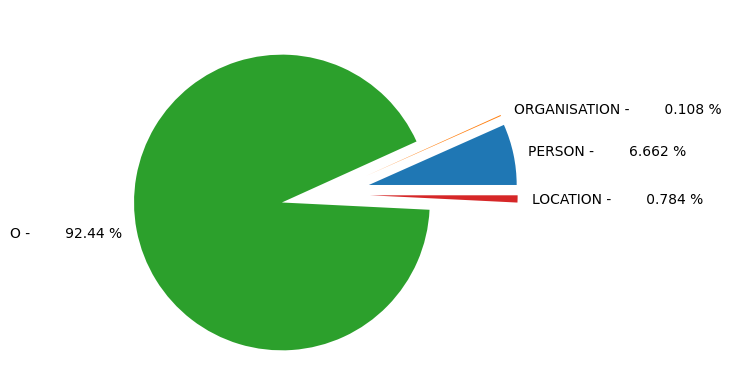

In [97]:
import matplotlib.pyplot as plt
import numpy as np

counts = []
mylabels = ['PERSON' ,'ORGANISATION' , 'O' , 'LOCATION' , ]
new_labels = []
total_count = sum([Tags_dictionary_count[x] for x in Tags_dictionary_count])

for label in mylabels:
  new_labels.append(label + " -        " + str(Tags_dictionary_count[label]/total_count * 100)[:5] +" %")
  counts.append(Tags_dictionary_count[label])
myexplode = [0.3, 0.3, 0.30, 0.30 ]

plt.pie(counts, labels = new_labels , explode = myexplode)
plt.show()

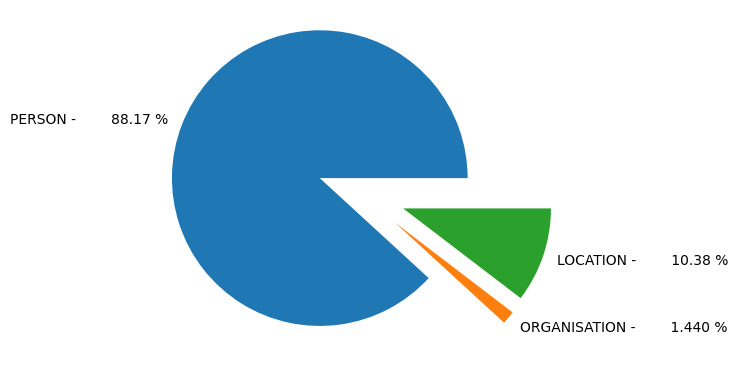

In [98]:
import matplotlib.pyplot as plt
import numpy as np

counts = []
mylabels = ['PERSON' ,'ORGANISATION' , 'LOCATION'  ]
new_labels = []
total_count = sum([Tags_dictionary_count[x] for x in mylabels])

for label in mylabels:
  new_labels.append(label + " -        " + str(Tags_dictionary_count[label]/total_count * 100)[:5] +" %")
  counts.append(Tags_dictionary_count[label])
myexplode = [0.3, 0.3, 0.30,]

plt.pie(counts, labels = new_labels , explode = myexplode)
plt.show()

In [ ]:
sentences = [x['Sentence'] for x in data]

In [ ]:
tags = [x["Tags"] for x in data]

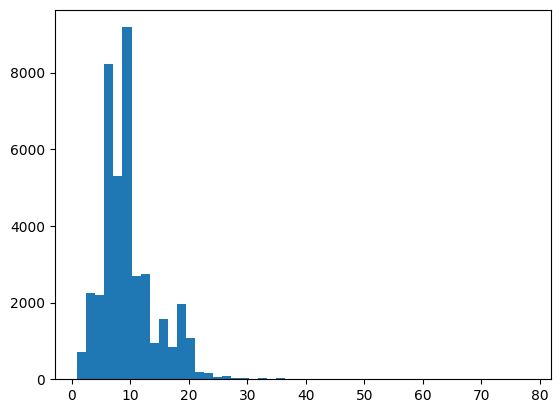

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([len(sen) for sen in sentences], bins = 50)
plt.show()

In [86]:
data = pickle.load(open("data_with_full_sentence.pkl" , 'rb'))

In [87]:
Tags_dictionary = {}
Tags_dictionary_count = {}

for dic in data:
  sent = dic["Sentence"]
  tags = dic["Tags"]
  for token,tag in zip(sent , tags):
    if tag not in Tags_dictionary:
      Tags_dictionary[tag] = []
    Tags_dictionary[tag].append(token)
    if tag not in Tags_dictionary_count:
      Tags_dictionary_count[tag] = 0
    Tags_dictionary_count[tag]+=1


Tags_dictionary_count

{'PERSON': 6509, 'O': 451122, 'ORGANISATION': 31, 'LOCATION': 439}

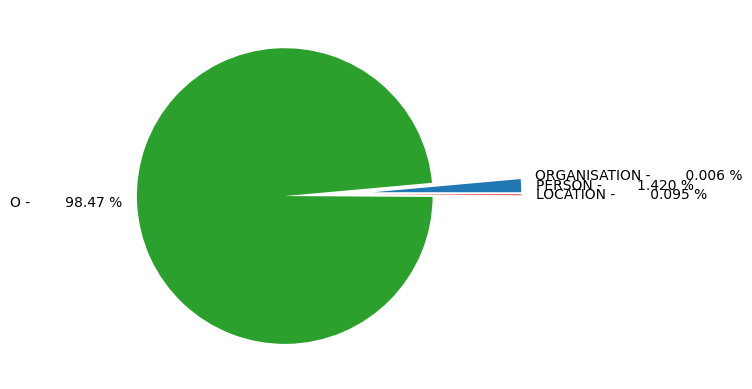

In [88]:
import matplotlib.pyplot as plt
import numpy as np

counts = []
mylabels = ['PERSON' ,'ORGANISATION' , 'O' , 'LOCATION' , ]
new_labels = []
total_count = sum([Tags_dictionary_count[x] for x in Tags_dictionary_count])

for label in mylabels:
  new_labels.append(label + " -        " + str(Tags_dictionary_count[label]/total_count * 100)[:5] +" %")
  counts.append(Tags_dictionary_count[label])
myexplode = [0.3, 0.3, 0.30, 0.30 ]

plt.pie(counts, labels = new_labels , explode = myexplode)
plt.show()

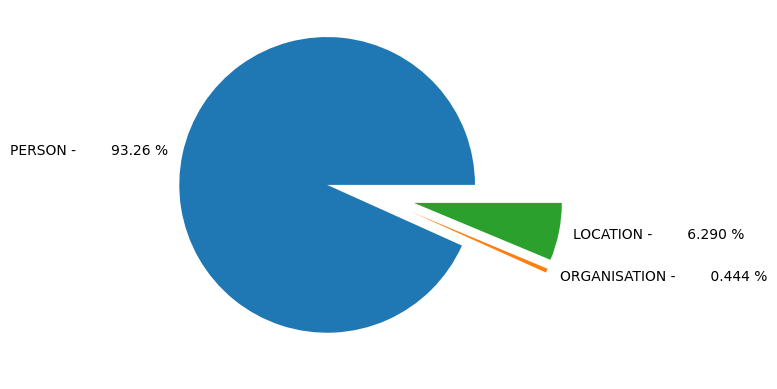

In [89]:
import matplotlib.pyplot as plt
import numpy as np

counts = []
mylabels = ['PERSON' ,'ORGANISATION' , 'LOCATION'  ]
new_labels = []
total_count = sum([Tags_dictionary_count[x] for x in mylabels])

for label in mylabels:
  new_labels.append(label + " -        " + str(Tags_dictionary_count[label]/total_count * 100)[:5] +" %")
  counts.append(Tags_dictionary_count[label])
myexplode = [0.3, 0.3, 0.30,]

plt.pie(counts, labels = new_labels , explode = myexplode)
plt.show()